In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [2]:
fairgp_files = [
    ('../results/ICML/adult/gpyt2500_dempar_tuning_race.csv', ''),
    ('../results/ICML/adult/gpyt2500_dempar_tuning_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$PR_t={num}${with_s}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)

In [3]:
fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

In [5]:
def acc_vs_di(plot, do_legend, *data):
    ms = 4
    xaxis = ('DIbinary', '$PR_{s=0}\\,/\\,PR_{s=1}$')
    yaxis = ('accuracy', 'accuracy')
    legends = []
    startindex = 0
    legend = "outside" if do_legend else None

    plot.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness" if do_legend else None)
    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if do_legend:
        return legends

In [6]:
def pr0_vs_pr1(plot, do_legend, *data):
    ms = 4
    xaxis = ('0-PR-race', '$PR_{s=0}$')
    yaxis = ('1-PR-race', '$PR_{s=1}$')
    legends = []
    startindex = 0
    legend = "outside" if do_legend else None

    plot.plot([0., 1.], [0., 1.], 'k--', label="perfect fairness" if do_legend else None)
    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if do_legend:
        return legends

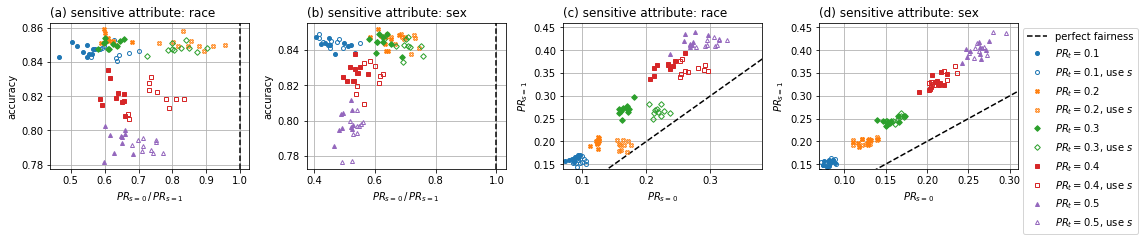

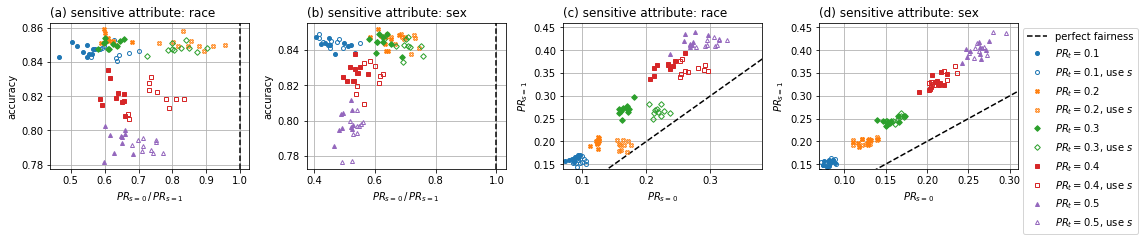

In [10]:
fig, plots = plt.subplots(ncols=4, figsize=(16, 2.4))
acc_vs_di(plots[0], False, fairgp[0])
plots[0].set_title("(a) sensitive attribute: race", loc='left')
# plots[0].set_ylim(0.14, 0.44)
# plots[0].set_xlim(0.07, 0.38)
acc_vs_di(plots[1], False, fairgp[1])
plots[1].set_title("(b) sensitive attribute: sex", loc='left')

pr0_vs_pr1(plots[2], False, fairgp[0])
plots[2].set_title("(c) sensitive attribute: race", loc='left')
plots[2].set_ylim(0.14, 0.46)
plots[2].set_xlim(0.07, 0.38)
legends = pr0_vs_pr1(plots[3], True, fairgp[1])
plots[3].set_title("(d) sensitive attribute: sex", loc='left')
plots[3].set_ylim(0.14, 0.46)
plots[3].set_xlim(0.07, 0.31)

fig.tight_layout()
fig.subplots_adjust(bottom=0)
fig.savefig(f"dempar_icml_tuning.pdf",
            dpi=200, bbox_extra_artists=legends, bbox_inches='tight', pad_inches=0)
fig